In [248]:
import numpy as np

In [249]:
alpha_angle=np.array([20, 25, 30, 35])
beta_dict = {20 : np.array([17, 17, 16, 17, 17]), 25 : np.array([22, 23, 22, 22, 23]), 30:np.array([26, 27, 26, 27, 27]), 35:np.array([32, 32, 32, 32, 32])}
U_dict = {20 : np.array([5.4, 5.7, 5.6, 5.8, 5.8]), 25 : np.array([5.8, 6, 6, 6, 5.8]), 30:np.array([5.8, 5.8, 6, 5.8, 5.8]), 35:np.array([6.2, 5.4, 5.6, 5.6, 5.8])}
time_dict = {20 : np.array([136, 130, 123, 126, 131]) * 1e-6, 25 : np.array([128, 113, 121, 124, 128]) * 1e-6, 30:np.array([121, 111, 121, 110, 118]) * 1e-6, 35:np.array([116, 111, 113, 116, 113]) * 1e-6}

l  = 42e-2
d  = 3.8e-2
ro = 7.8e3
g  = 9.8
R = 15e6*90/(90 + 15e6)
C = 10 * 1e-6
m = ro * (4/3) * np.pi * (d/2)**3
U0 = 6.6
Beta = np.sqrt(d) * 2.1e11/(3 * (1 - 0.3**2))

In [250]:
get_h      = lambda alpha : l * (1 - np.cos(np.radians(alpha)))
get_v      = lambda alpha : np.sqrt(2 * g * get_h(alpha))
get_k      = lambda u1, u2, v1, v2 : (u2 - u1) / (v1 - v2)
get_tau2   = lambda U0, U : R * C * np.log(U0/U)
get_tau1   = lambda v0 : 2.943*(5 * m/ (4* Beta))**(2/5) * v0**(-1/5)
get_S      = lambda K , v: (1 + K) * (m/2) * v
get_P      = lambda x : Beta * x**(3/2)
get_T = lambda u1, u2: .5 * m * (u1)**2 + .5 * m * (u2)**2

1.

In [251]:
v1 = get_v(alpha_angle)
v2 = 0
u1 = 0
u2 = get_v([ np.mean(val)  for val in beta_dict.values() ])
print("All calulations were done for every initial speed")
print("K",get_k(u1, u2, v1, v2))


All calulations were done for every initial speed
K [0.84125863 0.89740666 0.88884393 0.91663465]


2.

In [252]:
k_mean = get_k(u1, u2, v1, v2)
T0 = get_T(v1, 0)
T1 = get_T(0, u2)

print("Delta T" , T0 - T1, "(Delta T)/T0", (T0 - T1)/T0)

get_T_ast = lambda v, k : .25 * (1 - k**2)*m*v**2

print("T asterisk - T" ,get_T_ast(v1, k_mean))

Delta T [0.01625903 0.01682296 0.02594604 0.02665372] (Delta T)/T0 [0.29228391 0.19466129 0.20995647 0.15978092]
T asterisk - T [0.00812952 0.00841148 0.01297302 0.01332686]


3.

In [253]:
v1 = get_v(alpha_angle)
v2 = np.zeros(len(v1))
u1 = np.zeros(len(v1))
u2 = [get_v(np.mean(angle)) for key, angle in beta_dict.items()]

k = get_k(u1, u2, v1, v2)


S_list = get_S(k, u2)
print("S",S_list)

S [0.1222915  0.16755915 0.19756023 0.24019232]


4.

In [254]:
print("time with recalculation scheme",[np.mean(time) for time in time_dict.values()])

time with recalculation scheme [0.00012919999999999997, 0.0001228, 0.00011619999999999998, 0.00011379999999999999]


5.

In [255]:

print("time with capacitor", get_tau2( np.full( (len(alpha_angle)), U0), [np.mean(u) for key, u in U_dict.items()]))

time with capacitor [1.38280351e-04 9.78592930e-05 1.10104306e-04 1.28789987e-04]


6.

In [256]:
print("theoretic time"m get_tau1(get_v(alpha_angle)))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (624291522.py, line 1)

7.

In [ ]:
get_xmax1 = lambda v : ( (5 * m * v**2) / (4 * Beta) )**(2/5)
get_Pmax1 = lambda v : Beta**(2/5)*(5*m*v**2/4)**(3/5) 

get_xmax2 = lambda v,tau : 0.34 * v * tau
get_Pmax2 = lambda v,tau : 3.68 * m * v / tau

speed_list = get_v(alpha_angle)
tau_list   = get_tau1(speed_list)


print("First xmax,Pmax", get_xmax1(speed_list), get_Pmax1(speed_list))
print("Second xmax,Pmax", get_xmax2(speed_list, tau_list), get_Pmax2(speed_list, tau_list))



First [3.86289194e-05 4.60729241e-05 5.31585786e-05 5.99362848e-05] [3600.12255794 4689.39817738 5811.77090234 6957.97997485]
Second [3.86528694e-05 4.61014893e-05 5.31915370e-05 5.99734452e-05] [3601.34584117 4690.99158485 5813.74568009 6960.34422221]


8.

In [ ]:
Pmean = S_list / tau_list
print("Pmean",Pmean)
print("Pmax",get_Pmax1(speed_list))

[ 757.93392226 1085.26687894 1326.17183801 1661.45472215]
[3600.12255794 4689.39817738 5811.77090234 6957.97997485]


9.

In [ ]:
from scipy.integrate import quad


P_intg = lambda x : quad(get_P, 0, x)[0]

def get_nested(v):
    return lambda x : 2 / np.sqrt( v**2 - 2/m*P_intg(x) )

intg_list = [ quad(get_nested(sp), 0, get_xmax1(sp))[0] for sp in speed_list ]
print("intergation of function",intg_list)

[0.0001613635740733724, 0.00015440885870631095, 0.00014898423558431197, 0.0001445809926943988]


10.

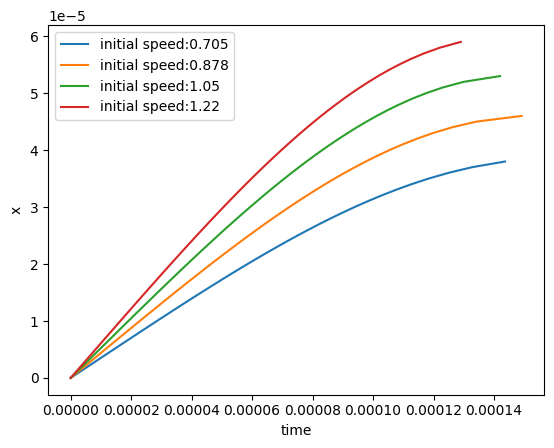

In [ ]:
import matplotlib.pyplot as plt


step = 1e-6


for speed in speed_list:
    max_x = get_xmax1(speed)
    rang = np.arange(0, max_x, step)
    plt.plot([ quad(get_nested(speed), 0, x )[0] for x in rang ], rang, label=f"initial speed:{round(speed, 3)}")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
#plt.show()
pass

